## LINEAR REGRESSION - PART 1 (ONE VARIABLE)

One variable linear regression is the simplest form of machine learning we can think of. The purpose of this practice is to learn the basics of different components about linear regression. 
#### DATASET http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

#### Wisconsin Breast Cancer Database
Samples arrive periodically as Dr. Wolberg reports his clinical cases.

1. Number of Instances: 699 (as of 15 July 1992)

2. Number of Attributes: 10 plus the class attribute

3. Attribute Information: (class attribute has been moved to last column)
   Attribute                     Domain
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

4. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

5. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)

In [735]:
import numpy as np
import pandas as pd
# Read input
inputdata = pd.read_csv("./data/breast-cancer-wisconsin.data.csv")
inputdata.head(3)

,id,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [736]:
# Preprocess the data so we can use it for regression. Specially the class values.
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for col in inputdata.columns:
    inputdata[col] = encoder.fit_transform(inputdata[col])
    
inputdata.head(5)

,id,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,172,4,0,0,0,1,0,2,0,0,0
1,175,4,3,3,4,6,1,2,1,0,0
2,176,2,0,0,0,1,2,2,0,0,0
3,177,5,7,7,0,2,4,2,6,0,0
4,179,3,0,0,2,1,0,2,0,0,0


## Explain the algorithm mathematically then write these methods:

#### Predict 
This method takes x, w, b and returns the value of y. <br/>
\begin{equation}
y_i = w*x_i+b
\end{equation}

In [737]:
def predict(x, w, b):
    return x*w + b

#### Cost_function/loss_function/risk_function:
The MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.
We are using mean squared error. 
\begin{equation}
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - (wx_i+b))^2
\end{equation}

In [738]:
def cost_function(x, y, w, b):
    n = len(x)
    total_error = 0.0
    for i in range(n):
        total_error += (y[i] - (w*x[i] + b))**2
    return total_error / n

#### Gradient descent
To minimize MSE we use Gradient Descent to calculate the gradient of our cost function.
There are two parameters (coefficients) in our cost function we can control: weight $w$ and bias $b$. Since we need to consider the impact each one has on the final prediction, we use partial derivatives.
Recall the cost function:
\begin{equation}
f(w,b)= \frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i+b))^2
\end{equation}
First lets find the partial derivative for $w$:
\begin{equation}
\frac{\partial f}{\partial w} = \frac{1}{n} \sum_{i=1}^n -2x_i(y_i - (wx_i+b))
\end{equation}
And the partial derivative for $b$:
\begin{equation}
\frac{\partial f}{\partial b} = \frac{1}{n} \sum_{i=1}^n -2(y_i - (wx_i+b))
\end{equation}


In [739]:
def update_weights(x, y, w, b, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    n = len(x)

    for i in range(n):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*x[i] * (y[i] - (w*x[i] + b))

        # -2(y - (mx + b))
        bias_deriv += -2*(y[i] - (w*x[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    w -= (weight_deriv / n) * learning_rate
    b -= (bias_deriv / n) * learning_rate

    return w, b

#### Train loop

Train the model. Things to cover:
1. Parameter vs hyperparameter
2. Learning rate: possibly l1 and l2 regularization
3. Number of iterrations also popularly known as epochs

In [740]:
def train_model(x, y, w, b, learning_rate, epochs):
    cost_history = []

    for i in range(epochs):
        w,b = update_weights(x, y, w, b, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(x, y, w, b)
        cost_history.append(cost)

        # Log Progress
        if (i+1) % 20 == 0:
            print("Epochs: ", str(i+1), " cost: ",  str(cost))

    return w, b, cost_history

#### Run the training
Pick a parameter! Possibly mitoses as it's the worst one. Make them focus on the weight and bias values we get!


In [741]:
x = inputdata['mitoses']
y = inputdata['class']
w, b, cost_history = train_model(x, y, 0, 0, 0.02, 500)
print(w, b)

Epochs:  20  cost:  0.195825832999
Epochs:  40  cost:  0.186797887359
Epochs:  60  cost:  0.184661770169
Epochs:  80  cost:  0.184123067902
Epochs:  100  cost:  0.183987035403
Epochs:  120  cost:  0.183952683729
Epochs:  140  cost:  0.183944009051
Epochs:  160  cost:  0.183941818473
Epochs:  180  cost:  0.183941265295
Epochs:  200  cost:  0.183941125604
Epochs:  220  cost:  0.183941090328
Epochs:  240  cost:  0.18394108142
Epochs:  260  cost:  0.183941079171
Epochs:  280  cost:  0.183941078603
Epochs:  300  cost:  0.183941078459
Epochs:  320  cost:  0.183941078423
Epochs:  340  cost:  0.183941078414
Epochs:  360  cost:  0.183941078412
Epochs:  380  cost:  0.183941078411
Epochs:  400  cost:  0.183941078411
Epochs:  420  cost:  0.183941078411
Epochs:  440  cost:  0.183941078411
Epochs:  460  cost:  0.183941078411
Epochs:  480  cost:  0.183941078411
Epochs:  500  cost:  0.183941078411
0.126559013642 0.272717465144


#### Predictive separation index (PSI) as score
We can use Predictive Separation Index (PSI), to use as the strength of a predictor. The equation is:
\begin{equation}
PSI ( x ) = [ \textrm{mean } ( \hat{ p } \textrm{ given } x ) \textrm{ when } y = 1 ] - [ \textrm{mean } ( \hat{ p } \textrm{ given } x ) \textrm{ when } y = 0 ] \, .
\end{equation}
We want PSI(x) very close to 1 as the first term should be close to 1 and the second term should be close to 0.

In [742]:
def get_score(x, y, w, b):
    preds_0 = []
    preds_1 = []
    for i in range(len(x)):
        p = predict(x[i], w, b)
        if y[i] == 0:
            preds_0.append(p)
        else:
            preds_1.append(p)
    score = (sum(preds_1) / len(preds_1) - sum(preds_0) / len(preds_0))
    return preds_0, preds_1, score

In [743]:
preds_0, preds_1, score = get_score(x, y, w, b)
print("PSI: ", score)

PSI:  0.18576351698


### The $\hat{p}$ distribution plot

A better way to look at our prediction is to look at the distribution of $\hat{p}$ we get for each of the classes. For $y_i = 0$ the $\hat{p}$ should be close to 0 and $\hat{p}$ should be close to 1 when $y_i = 1$. This is a better way of seeing the strength of a predictor.

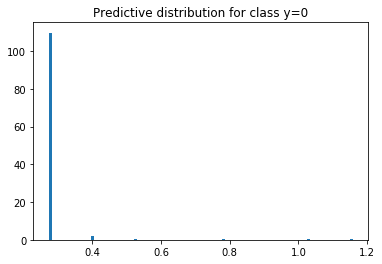

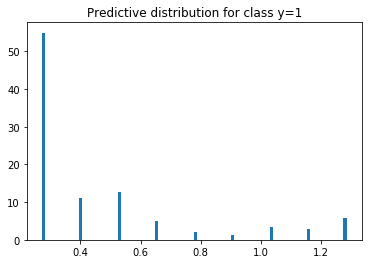

In [744]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(preds_0, bins=100, normed=1, cumulative=0)
plt.title('Predictive distribution for class y=0')
plt.show()
n, bins, patches = plt.hist(preds_1, bins=100, normed=1, cumulative=0)
plt.title('Predictive distribution for class y=1')
plt.show()

## Use a library to do the same thing! - SKLEARN
If we use sklearn to do the same thing, we will get the same exact values! Voilà! Things to make sure:
1) Sklearn linear regression parameters: fit_intercept, normalize, copy_X, n_jobs
    a) fit: Fit linear model. [Our train loop]
    b) predict: Predict using the linear model. [Our predict method]
    c) score: Returns the coefficient of determination $R^2$ of the prediction. <br/>
    
##### The R squared score:
R squared measures the proportion of overall variation of y variable that have been explained by the prediction. The equation for R squared is:
 \begin{align*}
 R^2 = 1 - \frac{\sum_{i=1}^n (y_i-\hat{y_i})^2}{\sum_{i=1}^n (y_i-\bar{y})^2}
 \end{align*}
 Here, $y_i$ is the label, $\hat{y_i}$ is the prediction and $\bar{y}$ is the average label. The error is normalized by the deviance and we get how well the regression no matter the deviation in the dataset. For a dichotomous classification this $R^2$ is same as predictive separation index but for continuous outcome it will be different.


In [745]:
x = inputdata[['mitoses']]
y = inputdata['class']
from sklearn import datasets, linear_model
lm_model = linear_model.LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
lm_model.fit(x, y)
print("sklearn, w, b, score: ", round(lm_model.coef_[0], 6), round(lm_model.intercept_, 6), round(lm_model.score(x,y), 6))
print("manualr, w, b, score: ", round(w, 6) , round(b, 6), round(score, 6))
# So, we have learned the same co-efficents (or, almost the same) through a library.

sklearn, w, b, score:  0.126559 0.272717 0.185764
manualr, w, b, score:  0.126559 0.272717 0.185764


#### Variable selection
Now loop through each of the feature/variable present in the dataset (except id and class) and fit the model to get a score. Sort features based on their score/R-squared-value the top variables are best predictors. <br/>

A better approach would be: <br/>
1) Make sure all the features are in same scale. <br/>
2) Use better algorithm like step wise criterion function (ex. bayesian information criterion) or xgBoost which is supposedly one of the best available algorithm for feature selection. <br/>

xgBoost: http://xgboost.readthedocs.io/en/latest/python/python_intro.html

But this works pretty well too! We'll see!

In [746]:
features = list(inputdata.keys())
features.remove('id')
features.remove('class')

feature_scores = []

for feature in features:
    x = inputdata[[feature]]
    y = inputdata['class']
    lm_model = linear_model.LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
    lm_model.fit(x, y)
    feature_scores.append([feature, lm_model.score(x,y)])

feature_scores.sort(key=lambda x: x[1], reverse=True)
for feature_score in feature_scores:
    print(feature_score)

['uniformity-of-cell-shape', 0.67065246956128566]
['uniformity-of-cell-size', 0.66896652023005876]
['bland-chromatin', 0.5724679929612666]
['clump-thickness', 0.51265795054826835]
['normal-nucleoli', 0.50729097711546645]
['marginal-adhesion', 0.4855305274798587]
['single-epithelial-cell-size', 0.46619471453550132]
['mitoses', 0.18576351399204383]
['bare-nuclei', 0.15365305810688346]


#### Pick the top two predictors

Pick the top two predictors and fit the model. The score will be better this time.

In [747]:
x = inputdata[['uniformity-of-cell-shape','uniformity-of-cell-size']]
y = inputdata['class']
lm_model = linear_model.LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
lm_model.fit(x, y)
print("Score: ", lm_model.score(x,y))

Score:  0.702523482374


#### Pick a cutoff

Now look at the distribution again and pick a cutoff. Everything below the cutoff will be 0 and above will be 1. 

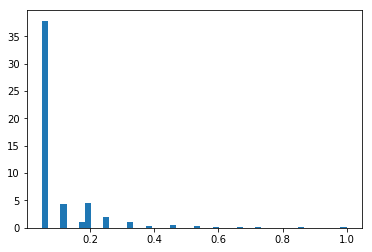

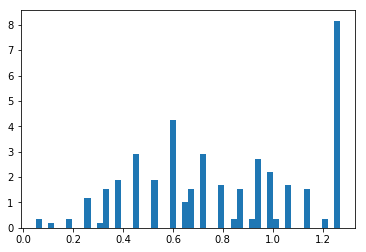

In [748]:
input_0 = inputdata.loc[inputdata['class'] == 0]
y_0 = input_0['class']
x_0 = input_0[['uniformity-of-cell-shape','uniformity-of-cell-size']]

input_1 = inputdata.loc[inputdata['class'] == 1]
y_1 = input_1['class']
x_1 = input_1[['uniformity-of-cell-shape','uniformity-of-cell-size']]
preds_0 = lm_model.predict(x_0)
preds_1 = lm_model.predict(x_1)
n, bins, patches = plt.hist(preds_0, bins=50, normed=1, cumulative=0)
plt.show()
n, bins, patches = plt.hist(preds_1, bins=50, normed=1, cumulative=0)
plt.show()

#### Accuracy
Looks like 0.2 is a good cutoff? Let's pick that and look at the accuracy of the model

In [749]:
y_pred = lm_model.predict(x)
y_pred = [1 if p > 0.2 else 0 for p in y_pred]
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.93133047210300424

## Splitting the dataset
But we can't trust these results! We trained and tested on the same data. This may overfit the data and give us an illusion of better fit. Let's split the dataset in 80-20 for training-testing and fit and test the model again.

In [750]:
# split into train and test data
from sklearn.model_selection import train_test_split

(train,test) = train_test_split(inputdata, test_size=0.2)
train_output = train['class']
train_input = train[['uniformity-of-cell-shape','uniformity-of-cell-size']]

test_output = test['class']
test_input = test[['uniformity-of-cell-shape','uniformity-of-cell-size']]

In [751]:
lm_model.fit(train_input, train_output)
print("Score: ", lm_model.score(train_input, train_output))

Score:  0.687560966002


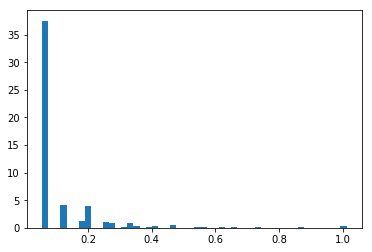

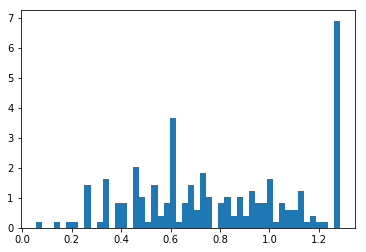

In [752]:
input_0 = train.loc[train['class'] == 0]
y_0 = input_0['class']
x_0 = input_0[['uniformity-of-cell-shape','uniformity-of-cell-size']]

input_1 = train.loc[train['class'] == 1]
y_1 = input_1['class']
x_1 = input_1[['uniformity-of-cell-shape','uniformity-of-cell-size']]
preds_0 = lm_model.predict(x_0)
preds_1 = lm_model.predict(x_1)
n, bins, patches = plt.hist(preds_0, bins=50, normed=1, cumulative=0)
plt.show()
n, bins, patches = plt.hist(preds_1, bins=50, normed=1, cumulative=0)
plt.show()

In [753]:
y_pred = lm_model.predict(test_input)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]
from sklearn.metrics import accuracy_score
accuracy_score(test_output, y_pred)

0.94285714285714284

## Break the accuracy myth
We see that we are getting decent accuracy. But accuracy in a model doesn't mean the model is useful. There are many other statistical tests that can help us understand the effectiveness of a model. Sensitivity, specificity are widely used. We are going to look at true positive rate and false positive rates as simplest statistical significance values of the model.

In [754]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_output, y_pred))
tn, fp, fn, tp = confusion_matrix(test_output, y_pred).ravel()
fpr = fp / (fp+tn)
fnr = fn / (tp+fn)
print("False positive rate: (predicting malignant while benign)", fpr)
print("False negative rate: (predicting benign while malignant)", fnr)

[[98  1]
 [ 7 34]]
False positive rate: (predicting malignant while benign) 0.010101010101
False negative rate: (predicting benign while malignant) 0.170731707317


## Which case is the worst?
Think about this model in action. It has a very low false positive rate but a high false negative rate. False negative results in real world is very dangerous in our case. On the other hand, false positive results will cause a lot of chaos. But, if we have to make a decision, which is the best one?

In [755]:
y_pred = lm_model.predict(test_input)
y_pred = [1 if p > 0.1 else 0 for p in y_pred]

print("Accuracy", accuracy_score(test_output, y_pred))

print(confusion_matrix(test_output, y_pred))
tn, fp, fn, tp = confusion_matrix(test_output, y_pred).ravel()
fpr = fp / (fp+tn)
fnr = fn / (tp+fn)
print("False positive rate: (predicting malignant while benign)", fpr)
print("False negative rate: (predicting benign while malignant)", fnr)

Accuracy 0.792857142857
[[71 28]
 [ 1 40]]
False positive rate: (predicting malignant while benign) 0.282828282828
False negative rate: (predicting benign while malignant) 0.0243902439024
